In [1]:
import sys
import os
import glob
import gc
import numpy as np
from pathlib import Path
from matplotlib.pyplot import *
%matplotlib inline

from qubicpack.qubicfp import qubicfp
from qubic.lib.Calibration import Qfiber as ft
# from qubic import time_constants_tools as tct

In [2]:
# base_dir = '/sps/qubic/Data/Calib-TD/'
# base_dir = '/media/nahue/files_hdd/heavy-data/'

# base_dir = '/home/nahue/Downloads/'
# base_dir = '/home/nahue-ofi/heavy-data/'
base_dir = '/home/nahue-ofi/Nextcloud/time-constants/'


# base_save_path = '/media/nahue/files_hdd/heavy-data'
# specific_save_folder = '/time_constants_results/all_TC_datasets_my_computer_2'
# save_path = base_save_path+specific_save_folder

# Path(save_path).mkdir( parents=True, exist_ok=True )
    
# print(save_path)

In [25]:
# day = '2023-04-17'
day = '2025-05-22'
# day = '2023-05-24'

In [26]:
data_dir = base_dir + day + '/'
thedirs = np.sort(glob.glob(data_dir+'*carbon*'))

for j,thedir in enumerate(thedirs):
    print(j,thedir)

0 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.20.04__dome-open-carbonfibre
1 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.22.49__dome-open-carbonfibre
2 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.24.59__dome-open-carbonfibre
3 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_14.28.12__dome-open-carbonfibre


In [58]:
numfile = 2
thedatadir = thedirs[numfile]

print('\n')
print('We will analyze: {}'.format(thedatadir))
print('\n')

dataset_info = str.split(thedatadir,'/')[-1]

a = qubicfp()
a.assign_verbosity(0)
a.read_qubicstudio_dataset(thedatadir)

calsource_dict = a.calsource_info()
print(calsource_dict)
# print(calsource_dict['calsource'])
# print(calsource_dict['modulator'])
# print(calsource_dict['cf'])
# # caltime, calsourcedata = a.calsource()



We will analyze: /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.24.59__dome-open-carbonfibre


{'date': datetime.datetime(2025, 5, 22, 13, 25, 1, 680585), 'lamp': {}, 'modulator': {'status': 'ON', 'shape': 'sine', 'frequency': 0.33, 'amplitude': 2.0, 'offset': 1.0, 'duty_cycle': 'none', 'output': 'OFF'}, 'amplifier': {'status': 'OFF'}, 'calsource': {'status': 'OFF'}, 'cf': {'status': 'ON', 'shape': 'square', 'frequency': 0.2, 'amplitude': 2.0, 'offset': 1.0, 'duty_cycle': 33, 'output': 'ON'}}


In [59]:
tt1 = a.timeaxis(asic=1)
tt2 = a.timeaxis(asic=2)
tod1 = a.timeline_array(asic=1)
tod2 = a.timeline_array(asic=2)

tt1_ct = a.timeaxis(asic=1,axistype='computertime')
tt2_ct = a.timeaxis(asic=2,axistype='computertime')
tod1_ct = a.timeline_array(asic=1)
tod2_ct = a.timeline_array(asic=2)

tt, alltod = a.tod()

tt_ct, alltod_ct = a.tod(axistype='computertime')

print([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

t_init = np.min([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

print(t_init)

force_sync = True

if force_sync == True:
    
    tt1 -= tt1[0]
    tt2 -= tt2[0]
    tt1_ct -= tt1_ct[0]
    tt2_ct -= tt2_ct[0]
    tt -= tt[0]
    tt_ct -= tt_ct[0]

    print([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

else:

    tt1 -= t_init
    tt2 -= t_init
    tt1_ct -= t_init
    tt2_ct -= t_init
    tt -= t_init
    tt_ct -= t_init

    print([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

[1747920299.5410001, 1747920299.539, 1747920299.5410001, 1747920299.539]
1747920299.539
[0.0, 0.0, 0.0, 0.0]


In [44]:
# figure()
# plot(caltime, calsourcedata)

In [45]:
# highcut = 10 #Hz

# alltod_f = ft.filter_data(tt,alltod,highcut=highcut)
# tod1_f = ft.filter_data(tt1,tod1,highcut=highcut)
# tod2_f = ft.filter_data(tt2,tod2,highcut=highcut)
# tod1_ct_f = ft.filter_data(tt1_ct,tod1_ct,highcut=highcut)
# tod2_ct_f = ft.filter_data(tt2_ct,tod2_ct,highcut=highcut)

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

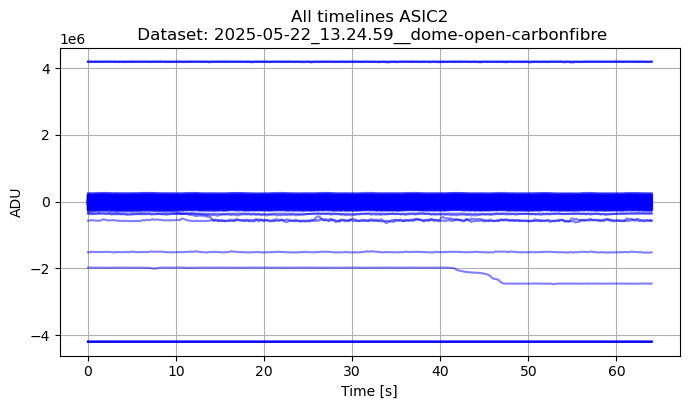

In [60]:
figure(figsize=(8,4))

title('All timelines ASIC2\n Dataset: {}'.format(dataset_info))
ylabel('ADU')
xlabel('Time [s]')
hasta=10000
for i in range(128):
#     plot(tt1[:hasta], tod1[i,:hasta])#, 'k-',alpha=0.5)
    plot(tt2[:hasta], tod2[i,:hasta], 'b-',alpha=0.5)
# ylim(-2.5,2.5)
grid()
tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

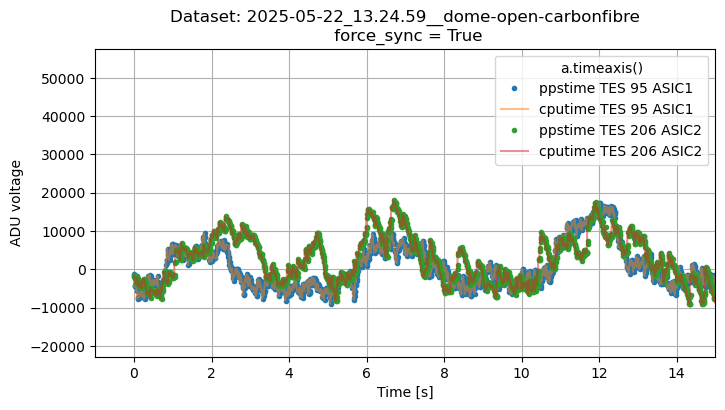

In [61]:
## asic 1

figure(figsize=(8,4))

tesnum = 95

if tesnum > 128:
    asic = 2
    tod_asic = tod2
    tt_asic = tt2
    tod_asic_ct = tod2_ct
    tt_asic_ct = tt2_ct
    
else:
    asic = 1
    tod_asic = tod1
    tt_asic = tt1
    tod_asic_ct = tod1_ct
    tt_asic_ct = tt1_ct

# title('TES #{} (ASIC = {}) \n Dataset: {}'.format(tesnum,asic,dataset_info))
# xlabel('Time [s]')
# ylabel('ADU voltage')
# plot(tt,alltod[tesnum-1]-np.mean(alltod[tesnum-1]),'.',label='a.tod(\'pps\') TES #{} (ASIC {})'.format(tesnum,asic))
# plot(tt_ct,alltod_ct[tesnum-1]-np.mean(alltod_ct[tesnum-1]),label='a.tod(\'computertime\') TES #{} (ASIC {})'.format(tesnum,asic))
plot(tt_asic,tod_asic[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic[tesnum-1 - (asic-1) * 128]),'.',label='ppstime TES {} ASIC{}'.format(tesnum,asic))
plot(tt_asic_ct,tod_asic_ct[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic_ct[tesnum-1 - (asic-1) * 128]),alpha=0.5,label='cputime TES {} ASIC{}'.format(tesnum,asic))
# grid()
# legend()
# tight_layout



# figure()

# plot(tt,alltod_f[tesnum-1],'.')
# plot(tt1,tod1_f[tesnum-1])
# plot(tt1_ct,tod1_ct_f[tesnum-1])

## asic 2

# figure(figsize = (8,4))

tesnum = 206

if tesnum > 128:
    asic = 2
    tod_asic = tod2
    tt_asic = tt2
    tod_asic_ct = tod2_ct
    tt_asic_ct = tt2_ct
    
else:
    asic = 1
    tod_asic = tod1
    tt_asic = tt1
    tod_asic_ct = tod1_ct
    tt_asic_ct = tt1_ct


title('Dataset: {}\n force_sync = {}'.format(dataset_info,force_sync))
xlabel('Time [s]')
ylabel('ADU voltage')
# plot(tt,alltod[tesnum-1]-np.mean(alltod[tesnum-1]),'.',label='a.tod(\'pps\') TES #{} (ASIC {})'.format(tesnum,asic))
# plot(tt_ct,alltod_ct[tesnum-1]-np.mean(alltod_ct[tesnum-1]),label='a.tod(\'computertime\') TES #{} (ASIC {})'.format(tesnum,asic))
plot(tt_asic,tod_asic[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic[tesnum-1 - (asic-1) * 128]),'.',label='ppstime TES {} ASIC{}'.format(tesnum,asic))
plot(tt_asic_ct,tod_asic_ct[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic_ct[tesnum-1 - (asic-1) * 128]),alpha=0.5,label='cputime TES {} ASIC{}'.format(tesnum,asic))
xlim(-1,15)
grid()
legend(title='a.timeaxis()',loc='upper right')
tight_layout

# figure()

# plot(tt,alltod_f[tesnum-1+128],'.')
# plot(tt2,tod2_f[tesnum-1])
# plot(tt2_ct,tod2_ct_f[tesnum-1])

In [62]:
print('Using a.timeaxis()...')
print('Initial ppstime difference (ASIC2 - ASIC1):', '{} ms'.format(1e3*(tt2[0]-tt1[0])))
print('Initial computertime difference (ASIC2 - ASIC1):', '{} ms'.format(1e3*(tt2_ct[0]-tt1_ct[0])))
print('Initial time difference (computertime - ppstime) for ASIC 1:', '{} ms'.format(1e3*(tt1_ct[0]-tt1[0])))
print('Initial time difference (computertime - ppstime) for ASIC 2:', '{} ms'.format(1e3*(tt2_ct[0]-tt2[0])))

Using a.timeaxis()...
Initial ppstime difference (ASIC2 - ASIC1): 0.0 ms
Initial computertime difference (ASIC2 - ASIC1): 0.0 ms
Initial time difference (computertime - ppstime) for ASIC 1: 0.0 ms
Initial time difference (computertime - ppstime) for ASIC 2: 0.0 ms


In [63]:
try:
    fmod = calsource_dict['cf']['frequency']
except:
    print('Give fmod')
    # if len(fmods[numberday])>1:
    #     fmod = fmods[numberday][numfile]
    # else:
    #     fmod = fmods[numberday][0]

# fmod = 0.2
period = 1/fmod
nbins = 100
print(period)

5.0


In [64]:
folded, t_fold, folded_nonorm, newdata = ft.fold_data(tt, alltod, period, nbins, median=True, rebin=False, verbose=False)

folded_ct, t_fold_ct, folded_nonorm_ct, newdata_ct = ft.fold_data(tt_ct, alltod_ct, period, nbins, median=True, rebin=False, verbose=False)

folded1, t_fold1, folded_nonorm1, newdata1 = ft.fold_data(tt1, tod1, period, nbins, median=True, rebin=False, verbose=False)

folded2, t_fold2, folded_nonorm2, newdata2 = ft.fold_data(tt2, tod2, period, nbins, median=True, rebin=False, verbose=False)

folded1_ct, t_fold1_ct, folded_nonorm1_ct, newdata1_ct = ft.fold_data(tt1_ct, tod1_ct, period, nbins, median=True, rebin=False, verbose=False)

folded2_ct, t_fold2_ct, folded_nonorm2_ct, newdata2_ct = ft.fold_data(tt2_ct, tod2_ct, period, nbins, median=True, rebin=False, verbose=False)

Detectors   1%[                                                   ]ETA:  0:00:08

Detectors 100%[===================================================]Time: 0:00:14
Detectors   1%[                                                   ]ETA:  0:00:08

Detectors 100%[===================================================]Time: 0:00:13
Detectors   1%[                                                   ]ETA:  0:00:03

Detectors 100%[===================================================]Time: 0:00:07
Detectors   1%[                                                   ]ETA:  0:00:03

Detectors 100%[===================================================]Time: 0:00:06
Detectors   1%[                                                   ]ETA:  0:00:03

Detectors 100%[===================================================]Time: 0:00:07
Detectors   1%[                                                   ]ETA:  0:00:03

Detectors 100%[===================================================]Time: 0:00:06


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

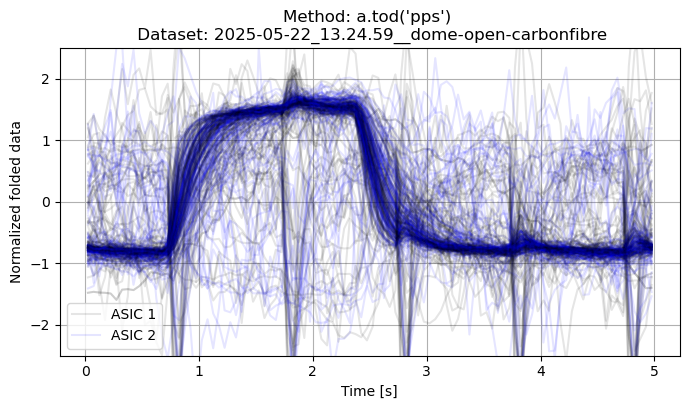

In [65]:
figure(figsize=(8,4))

title('Method: a.tod(\'pps\') \n Dataset: {}'.format(dataset_info))
ylabel('Normalized folded data')
xlabel('Time [s]')
for i in range(128):
    if i==0:
        plot(t_fold, folded[i,:], 'k-',alpha=0.1,label='ASIC 1')
        plot(t_fold, folded[i+128,:], 'b-',alpha=0.1,label='ASIC 2')        
    plot(t_fold, folded[i,:], 'k-',alpha=0.1)
    plot(t_fold, folded[i+128,:], 'b-',alpha=0.1)  
ylim(-2.5,2.5)
grid()
legend()
tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

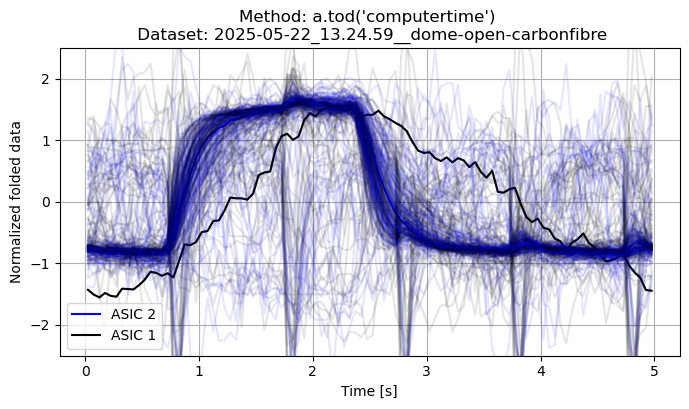

In [66]:
figure(figsize=(8,4))

title('Method: a.tod(\'computertime\') \n Dataset: {}'.format(dataset_info))
ylabel('Normalized folded data')
xlabel('Time [s]')
for i in range(128):
    if i==0:
        plot(t_fold_ct, folded_ct[i+128,:], 'b-',alpha=1,label='ASIC 2')    
        plot(t_fold_ct, folded_ct[i,:], 'k-',alpha=1,label='ASIC 1')    
    plot(t_fold_ct, folded_ct[i+128,:], 'b-',alpha=0.1)
    plot(t_fold_ct, folded_ct[i,:], 'k-',alpha=0.1)

ylim(-2.5,2.5)
grid()
legend()
tight_layout

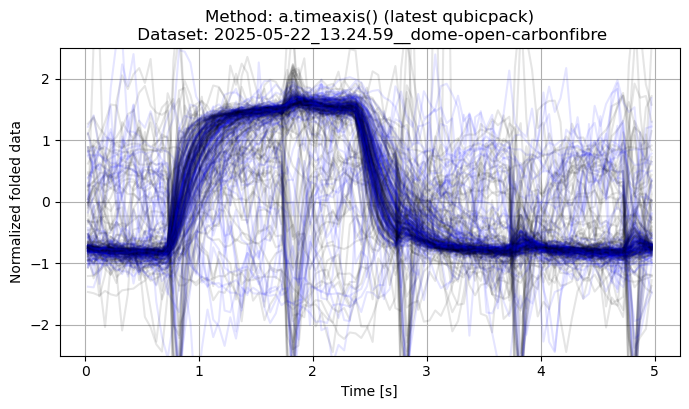

In [68]:
figure(figsize=(8,4))

title('Method: a.timeaxis() (latest qubicpack)\n Dataset: {}'.format(dataset_info))
ylabel('Normalized folded data')
xlabel('Time [s]')
for i in range(128):
    plot(t_fold1, folded1[i,:], 'k-',alpha=0.1)
    plot(t_fold2, folded2[i,:], 'b-',alpha=0.1)
ylim(-2.5,2.5)
grid()

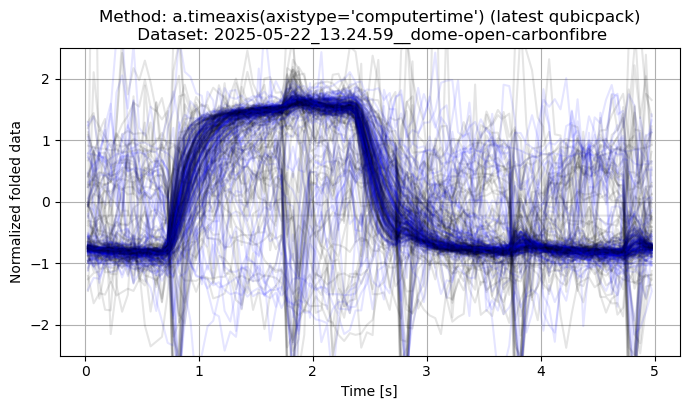

In [69]:
figure(figsize=(8,4))

title('Method: a.timeaxis(axistype=\'computertime\') (latest qubicpack)\n Dataset: {}'.format(dataset_info))
ylabel('Normalized folded data')
xlabel('Time [s]')
for i in range(128):
    plot(t_fold1_ct, folded1_ct[i,:], 'k-',alpha=0.1)
    plot(t_fold2_ct, folded2_ct[i,:], 'b-',alpha=0.1)
ylim(-2.5,2.5)
grid()

In [55]:
from scipy import signal

import matplotlib.mlab as mlab
# from qubic import fibtools as ft
import scipy.ndimage as f

In [56]:
tt_ct, alltod_ct = a.tod(axistype='computertime')

tt = tt_ct
alltod = alltod_ct

spectra = []
smooth_param = 2
smooth_spectra = []

for i in np.arange(256):
    spectrum_f, freq_f = ft.power_spectrum(tt, alltod[i], rebin=True)
    spectra.append(spectrum_f)
    smooth_spectrum_f = f.gaussian_filter1d(spectra[i],smooth_param)
    smooth_spectra.append(smooth_spectrum_f)


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

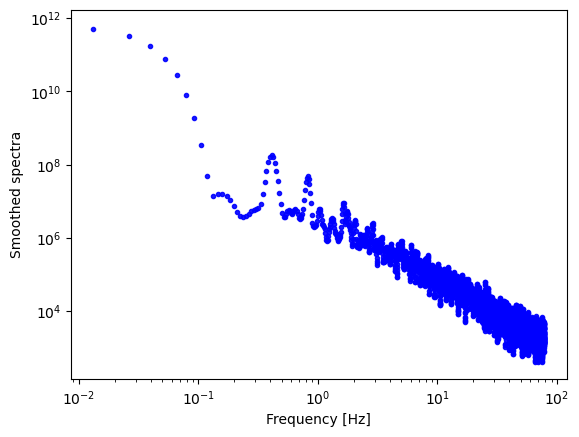

In [57]:
%matplotlib inline

spectra = np.asarray(spectra)
smooth_spectra = np.asarray(smooth_spectra)

figure()
# for i in np.arange(256):
#         plot(freq_f, smooth_spectra[i],'b-',alpha=0.1)
tesnum = 96

plot(freq_f, smooth_spectra[tesnum-1],'b.',alpha=0.9)

yscale('log')
xscale('log')
# legend()
xlabel('Frequency [Hz]')
ylabel('Smoothed spectra')
tight_layout